<a href="https://colab.research.google.com/github/manishaneupane3901/CODSOFT/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

TASK 1- TITANIC SURVIVAL PREDICTION

*   AUTHOR:Manisha Neupane(OCT BATCH A11)
*   Objective:To predict whether the passenger survived or not.





In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier






Loading dataset

In [6]:
titanic =pd.read_csv('tested.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data preprocessing

In [7]:
titanic.drop(columns='Age',axis =1,inplace= True)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S


**Data analysis**


In [8]:
titanic.describe()
#find the number of people survived 0=not survived 1=survived
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**Data visualization**


Probabilty of survival

Text(0.5, 1.0, 'Survival probability by Passenger class')

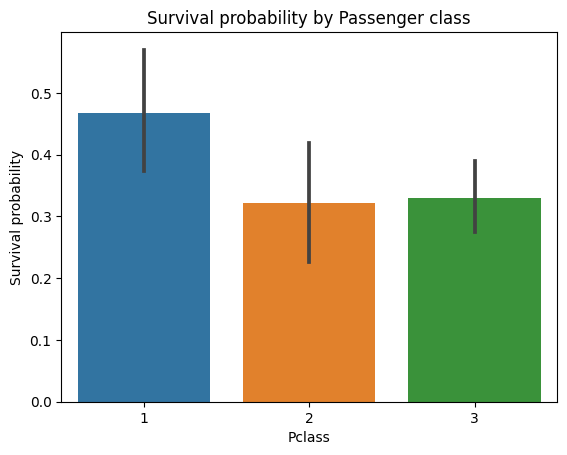

In [9]:
sns.barplot(x="Pclass",y="Survived",data=titanic)
plt.ylabel("Survival probability")
plt.title("Survival probability by Passenger class")

<Axes: xlabel='Pclass', ylabel='count'>

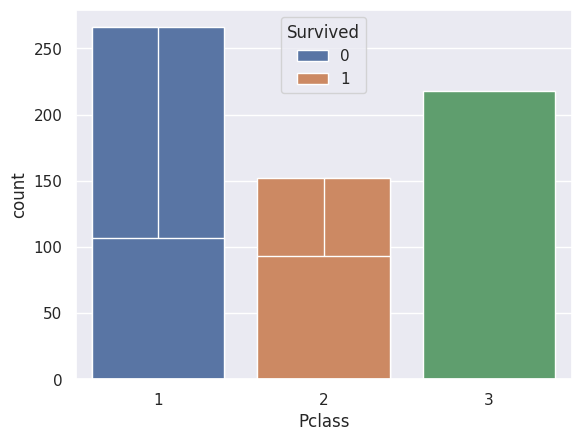

In [10]:

sns.set()
#plot for survived column
sns.countplot(x='Survived', data=titanic)
#Genderwise survivor
sns.countplot(x='Sex',hue='Survived', data=titanic)
#plot for pclass
sns.countplot(x='Pclass', data=titanic)



**Onhot encoding the categorical column**


In [11]:
titanic['Sex'].value_counts()
titanic['Embarked'].value_counts()
#converting categorical columns
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,7.0000,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,12.2875,NaN,0


Seperating features and target


In [12]:
X = titanic[['Sex','Pclass']]
Y = titanic['Survived']
X
Y


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

**Splitting data**

In [13]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# print(X_train.shape,X.shape,X_test.shape)



In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [17]:
titanic.dropna(subset=['Sex','Pclass',],inplace=True)
X= titanic[['Sex','Pclass']]
Y=titanic['Survived']

Model Training


In [ ]:
model=RandomForestClassifier(random_state=32)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=32)

In [20]:
model= RandomForestClassifier(random_state=32)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=32)

In [24]:
Y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix: On Baseline Model")
print(conf_matrix)

Confusion Matrix: On Baseline Model
[[50  0]
 [ 0 34]]


Accuracy of test data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



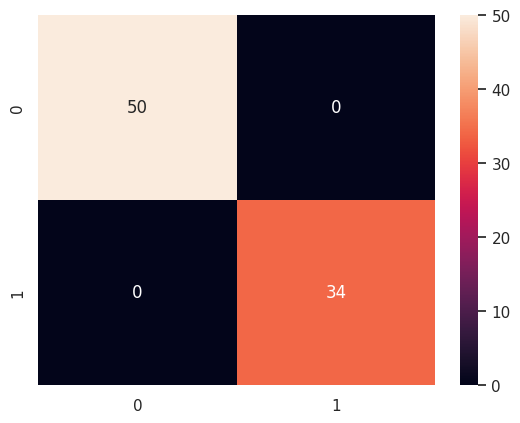

not survived


In [30]:
Y_pred = model.predict(X_test)
Y_pred
X_test_prediction =model.predict(X_test)
X_test_prediction
#accuracy check in test data
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy of test data:',test_data_accuracy)
print(classification_report(Y_test, Y_pred))
confusion_mtx = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.show()

demo =model.predict([[0,2]])
if(demo==0):
  print("not survived")
else:
  print("Survived")